# InsideOut Final Project Shenkar College 2024

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/7z/lsvtctdd3pz4fhtvppypnv9c0000gp/T/ipykernel_88840/2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading The Dataset

### Loading `ds4`

In [2]:
ds4 = pd.read_csv('dataset4.csv')
ds4

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


### Loading `ds4_dict`

In [3]:
ds4_dict = pd.read_csv("dataset4 dictionary.csv")
dataset_ds4_dict = ds4_dict[ds4_dict['Variable Name'].isin(set(ds4.columns))]
ds4_dict

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,NaN,integer,Unique identifier associated with a patient un...,NaN
1,identifier,hospital_id,NaN,integer,Unique identifier associated with a hospital,NaN
2,identifier,patient_id,NaN,integer,Unique identifier associated with a patient,NaN
3,demographic,hospital_death,NaN,binary,Whether the patient died during this hospitali...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,NaN
...,...,...,...,...,...,...
183,APACHE comorbidity,lymphoma,NaN,binary,Whether the patient has been diagnosed with no...,1
184,APACHE comorbidity,solid_tumor_with_metastasis,NaN,binary,Whether the patient has been diagnosed with an...,1
185,APACHE grouping,apache_3j_bodysystem,NaN,string,Admission diagnosis group for APACHE III,Cardiovascular
186,APACHE grouping,apache_2_bodysystem,NaN,string,Admission diagnosis group for APACHE II,Respiratory


## Preprocessing

### Remove Rows With Too Much Missing Values
> Creating dataframe called `ds4_preprocessed` for future use

#### Ploting the missing values in `ds4`

Every yellow plot in the graph represent a missing value

Looks like there are some columns that has a lot of missing values at the right of the plot

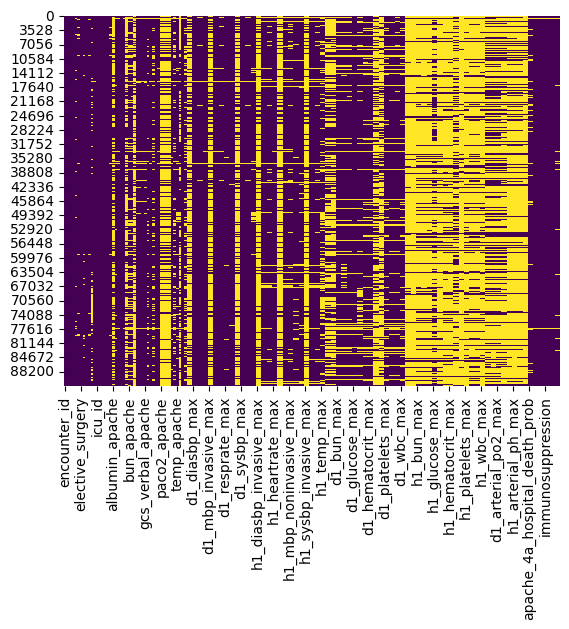

In [4]:
sns.heatmap(ds4.isnull(), cbar=False, cmap='viridis')
plt.show()

#### Ploting the columns with the highest percentage of missing values of all rows

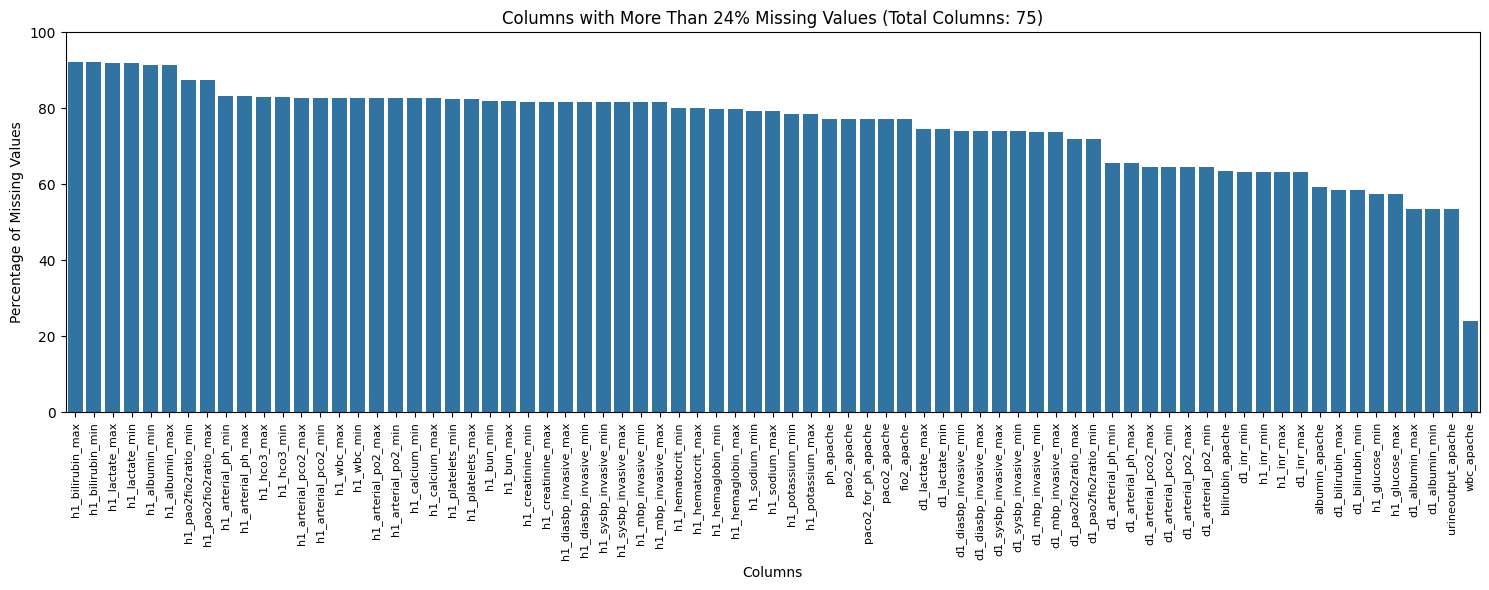

In [5]:
total_rows = len(ds4)
missing_values_percentage = (ds4.isnull().sum() / total_rows) * 100

# Filter and sort columns where more than 24% of the data is missing
columns_with_over_24_percent_missing = missing_values_percentage[missing_values_percentage > 24].sort_values(ascending=False).index
num_of_columns = len(columns_with_over_24_percent_missing)  # Count the number of columns

plt.figure(figsize=(15, 6))
ax = sns.barplot(x=columns_with_over_24_percent_missing, y=missing_values_percentage[columns_with_over_24_percent_missing])
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title(f'Columns with More Than 24% Missing Values (Total Columns: {num_of_columns})')
plt.xticks(rotation=90, fontsize=8)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

#### Missing Value Distribution in Dataset Rows

This plot showing how rows in a dataset are distributed across different ranges of missing value percentages.

It helps in quickly assessing the extent of missing data in each row.

Looks like most of the rows has between 30 to 40 percent of missing values in their columns.

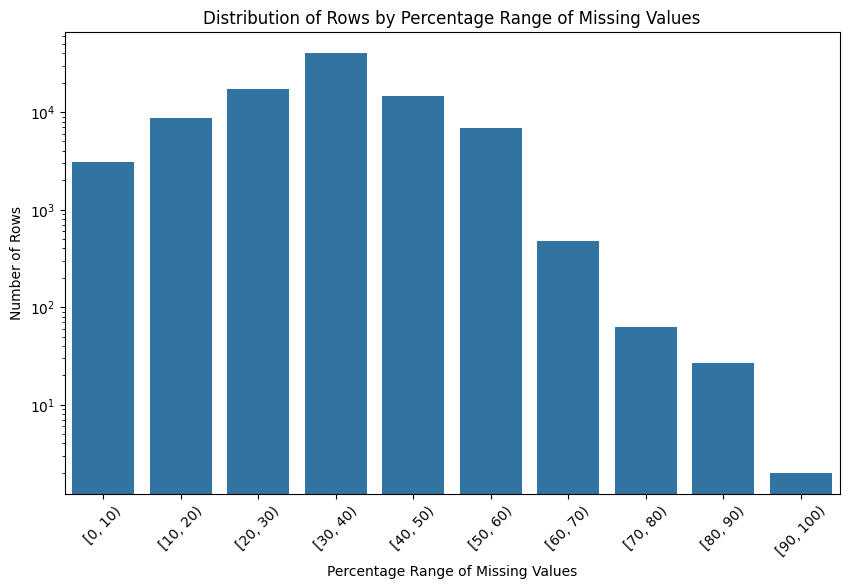

In [6]:
num_columns = len(ds4.columns)
row_missing_values_percentage = (ds4.isnull().sum(axis=1) / num_columns) * 100

bins = np.arange(0, 101, 10)
categories = pd.cut(row_missing_values_percentage, bins, right=False, include_lowest=True)
category_counts = categories.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index.astype(str), y=category_counts.values)
plt.xlabel('Percentage Range of Missing Values')
plt.ylabel('Number of Rows')
plt.title('Distribution of Rows by Percentage Range of Missing Values')
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

#### Removing Columns and Rows with High Levels of Missing Values

- Calculate the percentage of missing values for each column and row in our DataFrame `ds4`.

- Sort these percentages in descending order to identify which columns and rows have the highest proportion of missing values.

- Focus on the most incomplete data by establishing a threshold of 50% missing values.

- Count how many columns and rows have missing values exceeding this threshold and identify them.

- Columns and rows that exceed the threshold are then listed for removal.

In [7]:
# Calculate the percentage of missing values per column and per row
column_missing_values_percentage = (ds4.isnull().sum() / len(ds4)) * 100
row_missing_values_percentage = (ds4.isnull().sum(axis=1) / len(ds4.columns)) * 100

# Sort columns and rows by the percentage of missing values in descending order
sorted_columns_by_missing = column_missing_values_percentage.sort_values(ascending=False)
sorted_rows_by_missing = row_missing_values_percentage.sort_values(ascending=False)

# Determine a threshold for cutting off columns and rows with the highest missing values.
# We'll look at the distribution to decide on the threshold.
column_threshold = sorted_columns_by_missing[sorted_columns_by_missing > 50].count()
row_threshold = sorted_rows_by_missing[sorted_rows_by_missing > 50].count()

# Now we will cut off the columns and rows above the 50% threshold of missing values
columns_to_remove = sorted_columns_by_missing.index[:column_threshold]
rows_to_remove = sorted_rows_by_missing.index[:row_threshold]

# Create a mask for the dataset without the columns with the highest missing values
column_mask = ds4.columns.difference(columns_to_remove)

# Apply the mask to remove the columns
dataset_reduced_columns = ds4[column_mask]

# Remove the rows with the highest missing values
ds4_preprocessed = dataset_reduced_columns.drop(index=rows_to_remove).reset_index(drop=True)

f"shape of the original dataset `ds4` {ds4.shape}. shape of the preprocessed dataset `ds4_preprocessed` {ds4_preprocessed.shape}"

'shape of the original dataset `ds4` (91713, 186). shape of the preprocessed dataset `ds4_preprocessed` (84700, 112)'

Checking if the proposed label `"hospital_death"` is in the preprocessed table:

In [8]:
"hospital_death" in ds4_preprocessed.columns

True

#### Comparing the heatmaps of `ds4` and `ds4_preprocessed`

- *Yellow:* means missing value

- *Purple:* means exist value

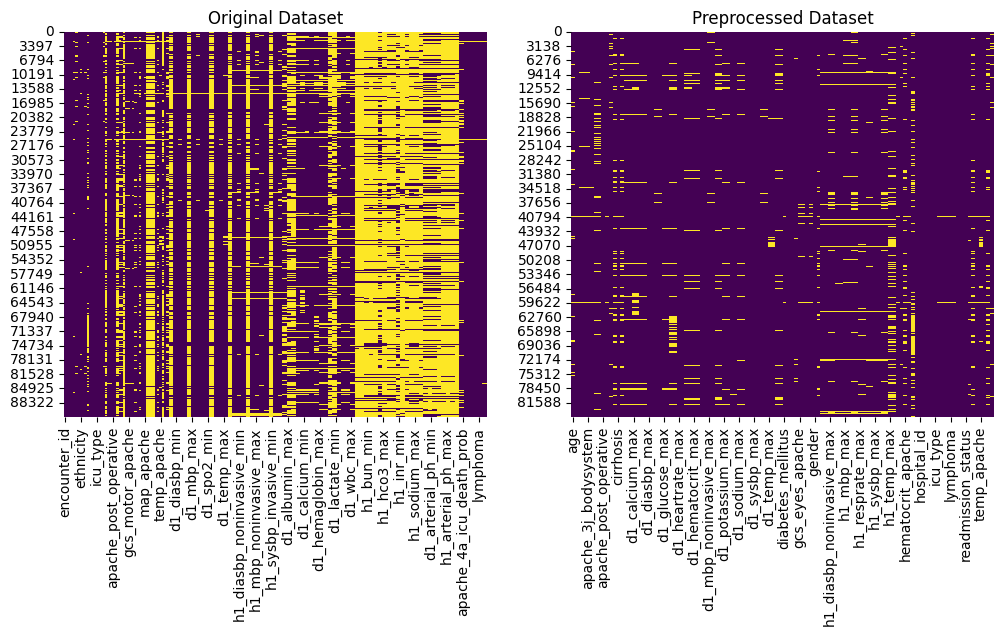

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(ds4.isnull(), cbar=False, cmap='viridis', ax=ax[0])
ax[0].set_title('Original Dataset')

sns.heatmap(ds4_preprocessed.isnull(), cbar=False, cmap='viridis', ax=ax[1])
ax[1].set_title('Preprocessed Dataset')

plt.show()

### Dealing with `ds4_dict`

#### Handling Boolean Columns

In the `ds4_dict` there's datatype for each column

so we need to match the types to the `ds4_preprocessed`

In [10]:
booleans = ds4_dict[ds4_dict['Data Type'] == 'binary']["Variable Name"]
for boolean in booleans:
    ds4_preprocessed[boolean] = ds4_preprocessed[boolean].astype(bool)

#### Fixing `ds4_dict` Dataframe

Remove rows in the `ds4_dict` that represents columns that not exists in `ds4_preprocessed`

In [11]:
ds4_dict = ds4_dict[ds4_dict['Variable Name'].isin(set(ds4.columns))]

There are three mistakes in the `ds4_dict` table

the row `apache_2_diagnosis` column that is string should be integer

the rows `bmi` and `apache_3j_diagnosis` columns that are strings should be floats

In [12]:
if ds4_preprocessed['apache_2_diagnosis'].dropna().apply(lambda x: x == int(x)).all():
    ds4_dict.loc[ds4_dict['Variable Name'] == "apache_2_diagnosis", 'Data Type'] = "integer"

ds4_dict.loc[ds4_dict['Variable Name'].isin(["bmi", "apache_3j_diagnosis"]), 'Data Type'] = "float"
ds4_dict[ds4_dict['Variable Name'].isin(["bmi", "apache_3j_diagnosis"])]

/var/folders/7z/lsvtctdd3pz4fhtvppypnv9c0000gp/T/ipykernel_88840/4126700355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds4_dict.loc[ds4_dict['Variable Name'] == "apache_2_diagnosis", 'Data Type'] = "integer"
/var/folders/7z/lsvtctdd3pz4fhtvppypnv9c0000gp/T/ipykernel_88840/4126700355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds4_dict.loc[ds4_dict['Variable Name'].isin(["bmi", "apache_3j_diagnosis"]), 'Data Type'] = "float"


,Category,Variable Name,Unit of Measure,Data Type,Description,Example
5,demographic,bmi,kilograms/metres^2,float,The body mass index of the person on unit admi...,21.5
21,APACHE covariate,apache_3j_diagnosis,NaN,float,The APACHE III-J sub-diagnosis code which best...,1405


#### Finding candidates to be categoric

Check for unique values per column, if they are relativly low, they might be categorical

It looks like the columns `gcs_eyes_apache`, `gcs_motor_apache`, `gcs_verbal_apache` and `apache_2_diagnosis` are great canditates to be Categorical values

In [13]:
numeric_apache_covariates = ds4_dict[
    (ds4_dict["Category"] == "APACHE covariate") &
    (ds4_dict["Data Type"].isin(["numeric", "integer"]))
]["Variable Name"]

numeric_apache_covariates_in_ds4_preprocessed = list(set(numeric_apache_covariates.to_list()) & set(ds4_preprocessed.columns))

numeric_categoric_candidates = pd.DataFrame({
    'Minimum': ds4_preprocessed[numeric_apache_covariates_in_ds4_preprocessed].min(numeric_only=True),
    'Maximum': ds4_preprocessed[numeric_apache_covariates_in_ds4_preprocessed].max(numeric_only=True),
    'Count Unique': ds4_preprocessed[numeric_apache_covariates_in_ds4_preprocessed].nunique(),
    'Is All Ints': ds4_preprocessed[numeric_apache_covariates_in_ds4_preprocessed].apply(lambda x: x.dropna().apply(float.is_integer).all())
}).sort_values(by=['Is All Ints', 'Count Unique'], ascending=[False, True])

numeric_categories = numeric_categoric_candidates[
    (numeric_categoric_candidates["Count Unique"] < 100) & (numeric_categoric_candidates["Is All Ints"] == True)
]

numeric_categories

,Minimum,Maximum,Count Unique,Is All Ints
gcs_eyes_apache,1.0,4.0,4,True
gcs_verbal_apache,1.0,5.0,5,True
gcs_motor_apache,1.0,6.0,6,True
apache_2_diagnosis,101.0,308.0,44,True


In the `ds4_dict` there are columns that are strings

We want to check if they might be categories

In [14]:
stringVariables = ds4_dict[ds4_dict['Data Type'] == 'string']["Variable Name"]

strings_categories_candidates = pd.DataFrame({
    "Variable Name": stringVariables,
    "Array of unique values": stringVariables.apply(lambda col: ds4[col].unique()),
    "Number of unique values": stringVariables.apply(lambda col: ds4[col].nunique())
})

strings_categories_candidates

,Variable Name,Array of unique values,Number of unique values
7,ethnicity,"[Caucasian, nan, Hispanic, African American, A...",6
8,gender,"[M, F, nan]",2
10,hospital_admit_source,"[Floor, Emergency Department, Operating Room, ...",15
11,icu_admit_source,"[Floor, Accident & Emergency, Operating Room /...",5
14,icu_stay_type,"[admit, readmit, transfer]",3
15,icu_type,"[CTICU, Med-Surg ICU, CCU-CTICU, Neuro ICU, MI...",8
185,apache_3j_bodysystem,"[Sepsis, Respiratory, Metabolic, Cardiovascula...",11
186,apache_2_bodysystem,"[Cardiovascular, Respiratory, Metabolic, Traum...",10


Looks like they are categories, so we change their types to category

In [15]:
for col in numeric_categories.index:
    ds4_preprocessed[col] = ds4_preprocessed[col].astype('category')

for category in strings_categories_candidates["Variable Name"]:
    ds4_preprocessed[category] = ds4_preprocessed[category].astype('category')

ds4_dtypes = ds4_preprocessed.dtypes.rename('Data Type').to_frame()
ds4_dtypes[ds4_dtypes['Data Type'] == 'category']

,Data Type
apache_2_bodysystem,category
apache_2_diagnosis,category
apache_3j_bodysystem,category
ethnicity,category
gcs_eyes_apache,category
gcs_motor_apache,category
gcs_verbal_apache,category
gender,category
hospital_admit_source,category
icu_admit_source,category


#### Divide `ds4_preprocessed` by `ds4_dict` Categories

In [16]:
ds4_dict = ds4_dict[ds4_dict['Variable Name'].isin(set(ds4_preprocessed.columns))]

Looks like that in `ds4_dict` there are categories for the columns

> For example, 3 columns in the `ds4` that are used for `identifier`.

In [17]:
dictionary_category = ds4_dict["Category"].value_counts().reindex(ds4_dict['Category'].drop_duplicates()).to_frame().rename(columns={'Category': 'Counts'})
dictionary_category

,count
Category,
identifier,3
demographic,15
APACHE covariate,20
vitals,40
labs,22
APACHE prediction,2
APACHE comorbidity,8
APACHE grouping,2


In [18]:
df_dictionary = { }
for category in dictionary_category.index:
    df_dictionary[category] = ds4_preprocessed[ds4_dict[ds4_dict["Category"] == category]["Variable Name"].to_list()]

data_types_df = ds4_preprocessed.dtypes.to_frame().rename(columns={0: 'Data Type'})

numeric = data_types_df[
    ~data_types_df.index.isin(df_dictionary["identifier"].columns.to_list()) &
    ((data_types_df["Data Type"] == "int64") | (data_types_df["Data Type"] == "float64"))
]

categoric = data_types_df[
    (data_types_df["Data Type"] == "category")
]

booleans = data_types_df[
    (data_types_df["Data Type"] == "bool")
]

In [19]:
numeric_df = ds4_preprocessed[numeric.index]
categoric_df = ds4_preprocessed[categoric.index]
booleans_df = ds4_preprocessed[booleans.index]

In [20]:
df_dictionary.keys()

dict_keys(['identifier', 'demographic', 'APACHE covariate', 'vitals', 'labs', 'APACHE prediction', 'APACHE comorbidity', 'APACHE grouping'])

## Machine Learning

- `df_dictionary` - dictionary of dataframes. each key of the dictionary represent a dataframe with all the columns that under this category.

- `numeric_df` - dataframe with all the numerical columns

- `categoric_df` - dataframe with all the categorical columns

- `booleans_df` - dataframe with all the boolean columns

- `ds4` - dataframe of the original dataset4

- `ds4_preprocessed` - dataframe of the dataset4 preprocessed without missing values